### 6.1.1 단어와 문자의 원-핫 인코딩

단어수준의 one-hot encoding

In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# samples의 모든 단어(토큰)에 대해 index를 부여.
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

max_length = 10

# 결과를 저장할 배열
results = np.zeros(shape = (len(samples), 
                              max_length, 
                              max(token_index.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [ ]:
token_index  # 각 단어의 인덱스.

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

문자수준의 one-hot encoding

In [ ]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # 출력 가능한 모든 아스키(ASCII) 문자

token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) +1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample[:max_length]):
    index = token_index.get(character)
    results[i, j, index]=1.

In [ ]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 케라스를 사용한 단어수준의 원-핫 인코딩:

케라스의 Tokenizer: 원본 텍스트 데이터를 단어 또는 문자 수준의 one-hot encoding으로 변환해준다.
특수문자 제거, 빈도가 높은 N개의 단어만 선택

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words = 1000) # 가장 빈도가 높은 1000개의 단어만 선택하도록 함.
tokenizer.fit_on_texts(samples) # 단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환

one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary') # 직접 one-hot 이진 벡터 표현을 얻음. 

word_index = tokenizer.word_index # 계산된 단어 인덱스를 구함.
print("%s개의 고유한 토큰" %len(word_index))

9개의 고유한 토큰


In [ ]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

### 해싱 기법을 사용한 단어 수준의 원-핫 인코딩(간단한 예):
one-hot hashing 기법: 단어를 해싱하여 고정된 크기의 벡터로 변환.
- 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용.
- 메모리 절약 가능

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [ ]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
results.shape

(2, 10, 1000)

### 6.1.2 단어 임베딩 사용하기

- 단어 임베딩: 밀집 벡터. 저차원의 실수형 벡터
- 반면, 원핫 인코딩으로 만든 벡터는 고차원의 희소행렬이다.(sparse) 
- --> 따라서 단어 임베딩이 더 많은 정보를 적은 차원에 저장한다.

In [ ]:
# IMDB 데이터 로드

from keras.datasets import imdb
from keras import preprocessing

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 20  # 사용할 텍스트의 길이

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))

model.add(Flatten()) # 2D텐서로

model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6672 - acc: 0.6279 - val_loss: 0.6153 - val_acc: 0.6978
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5376 - acc: 0.7537 - val_loss: 0.5250 - val_acc: 0.7286
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4587 - acc: 0.7911 - val_loss: 0.4995 - 

### 6.1.3 원본텍스트에 GloVe 임베딩 적용하기

In [ ]:
# !wget http://s3.amazonaws.com/text-datasets/aclImdb.zip
# !unzip aclImdb.zip

In [77]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding = "utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

데이터 토큰화

In [78]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

88582개의 고유한 토큰을 찾았습니다.


In [79]:
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


임베딩 전처리

In [48]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-12 16:28:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-12 16:28:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-12 16:28:45--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [65]:
glove_dir = './datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


GloVe 임베딩 행렬 준비하기
- 임베딩 행렬의 i번째 원소는 (토큰화로 만든) 단어 인덱스의 i번째 단어에 상응하는 embedding_dim 차원 벡터이다.

In [66]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():  # word_index: 위의 IMDB데이터셋에서 찾은 토큰 
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector # 임베딩 인덱스에 없는 단어는 모두 0이 된다.

In [80]:
# 모델 정의
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### 모델에 GloVe 임베딩 로드하기
- Embedding 층은 하나의 가중치 행렬을 가진다.
- 이 행렬은 2D 부동 소수 행렬.
- 각 i번째 원소는 i번째 인덱스에 상응하는 단어 벡터

In [81]:
# GloVe 임베딩을 embedding 층에 로드하기.

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False  # 랜덤하게 초기화되었다면 훈련하는 동안 사전훈련된 부분이 업데이트 되면 안됌.

In [82]:
# 모델 훈련과 평가

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
              
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 96ms/step - loss: 1.4121 - acc: 0.4850 - val_loss: 0.6964 - val_acc: 0.5064
Epoch 2/10
7/7 [==============================] - 1s 77ms/step - loss: 0.6420 - acc: 0.7000 - val_loss: 0.6984 - val_acc: 0.5171
Epoch 3/10
7/7 [==============================] - 1s 82ms/step - loss: 0.5391 - acc: 0.7400 - val_loss: 0.7470 - val_acc: 0.5294
Epoch 4/10
7/7 [==============================] - 1s 80ms/step - loss: 0.4034 - acc: 0.8400 - val_loss: 0.9975 - val_acc: 0.5035
Epoch 5/10
7/7 [==============================] - 1s 79ms/step - loss: 0.2986 - acc: 0.8700 - val_loss: 0.6960 - val_acc: 0.5769
Epoch 6/10
7/7 [==============================] - 1s 75ms/step - loss: 0.1680 - acc: 0.9550 - val_loss: 1.5249 - val_acc: 0.5029
Epoch 7/10
7/7 [==============================] - 1s 77ms/step - loss: 0.1502 - acc: 0.9400 - val_loss: 1.2821 - val_acc: 0.5082
Epoch 8/10
7/7 [==============================] - 1s 75ms/step - loss: 0.1174 - acc: 0.9750 - val

결과 그래프 그리기

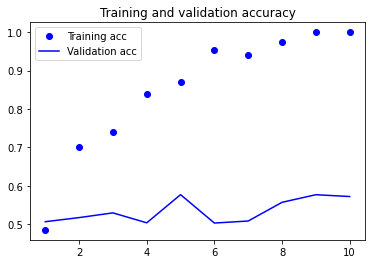

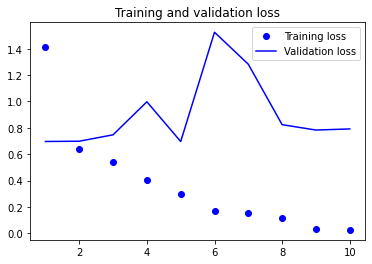

In [83]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 과대적합이 빠르게 일어나는 것을 볼 수 있다. training acc은 높지만, validation acc은 낮다.
- training sample수가 적기 때문에 위와 같이 나타날 수 있다.
- 어떤 샘플200개를 선택했는지에 따라 성능이 크게 좌우된다. 그래서 다른 샘플을 랜덤하게 다시 추출하면 또 다른 결과가 나올 수 있다. 

- 데이터가 풍부하다면, 사전훈련된 단어 임베딩(GloVe) 보다 해당 작업에 특화된 입력 토큰의 임베딩 학습이 더 성능이 높을 수 있다.

테스트 데이터 토큰화하고 
테스트 데이터에서 모델 평가하기.

In [84]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [85]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

# 테스트 정확도는 50%

749/749 [==============================] - 1s 2ms/step - loss: 0.7893 - acc: 0.5737


[0.7893432378768921, 0.5736883878707886]